# A Mobile-Ensembled model for COVID-19 Detection from Chest Xray images

In this work, two classes of Covid-19 Radiography Database have been used to train the model. this data splited into three group: train, valid, and test.

This code is part of the new study and will be referenced to the article after the publication.

- Proposed Method Implementation by M Amir Eshraghi.
- Feb 2023 / Iran.

In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
!pip install imutils
from imutils import paths
import cv2
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.applications import imagenet_utils
from tensorflow.keras import layers
from tensorflow import keras
!pip install tensorflow_addons
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
tfds.disable_progress_bar()

import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import random
f=0

import cv2
#import pyhdust.images as img
from skimage import filters as fl
from scipy.spatial import ConvexHull

import matplotlib.pyplot as plt
from skimage import morphology
from scipy import ndimage as ndi


In [3]:
import random

SEEDS= 69
BATCH_SIZE= 32
n=256
IMG_SHAPE= (n, n, 3)
IMG_SIZE= (n, n)
SPLIT= 0.9

#  - Data saving and resize 

- Training and validation sets:

In [4]:
!mkdir /tmp/COVID_dataset_resize

!mkdir /tmp/COVID_dataset_resize/
!mkdir /tmp/COVID_dataset_resize/Positive/
!mkdir /tmp/COVID_dataset_resize/Negative/
!mkdir /tmp/COVID_dataset_test/
!mkdir /tmp/COVID_dataset_test/Positive/
!mkdir /tmp/COVID_dataset_test/Negative/

mkdir: cannot create directory ‘/tmp/COVID_dataset_resize/’: File exists


In [5]:
data_path = '../input/covidx-cxr2/train'
train_text = open('../input/covidx-cxr2/train.txt','r')

train_list_filenames = []
train_list_labels    = []
train_list = train_text.readlines()
for line in train_list:
    splited = line.split(' ')
    
    if len(splited)==4:
        
        img_name = os.path.join(data_path, splited[1])
        img_label = splited[2]
    
        train_list_filenames.append(img_name)
        train_list_labels.append(img_label)

In [6]:
import time
start_time = time.time()      
s=0
for x in range(len(train_list_filenames)): 
    i = cv2.imread(train_list_filenames[x],cv2.IMREAD_UNCHANGED)
    #i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    i = cv2.resize(i,IMG_SIZE)
    
    if (train_list_labels[x] == 'negative'):
        cv2.imwrite('/tmp/COVID_dataset_resize/Negative/N'+str(s)+'.jpg',i)
    elif (train_list_labels[x] == 'positive'):
        cv2.imwrite('/tmp/COVID_dataset_resize/Positive/P'+str(s)+'.jpg',i)
    s+=1
    
#main()
print(" %s minute " % ((time.time() - start_time)/60))

 12.804565238952637 minute 


In [7]:
data_path = '../input/covidx-cxr2/test'
train_text = open('../input/covidx-cxr2/test.txt','r')

test_list_filenames = []
test_list_labels    = []
test_list = train_text.readlines()
for line in test_list:
    splited = line.split(' ')
    
    if len(splited)==4:
        
        img_name = os.path.join(data_path, splited[1])
        img_label = splited[2]
    
        test_list_filenames.append(img_name)
        test_list_labels.append(img_label)

In [8]:
import time
start_time = time.time()      
s=0
for x in range(len(test_list_filenames)): 
    i = cv2.imread(test_list_filenames[x],cv2.IMREAD_UNCHANGED)
    #i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    i = cv2.resize(i,IMG_SIZE)
    
    if (test_list_labels[x] == 'negative'):
        cv2.imwrite('/tmp/COVID_dataset_test/Negative/N'+str(s)+'.jpg',i)
    elif (test_list_labels[x] == 'positive'):
        cv2.imwrite('/tmp/COVID_dataset_test/Positive/P'+str(s)+'.jpg',i)
    s+=1
    
#main()
print(" %s minute " % ((time.time() - start_time)/60))

 0.5038600285847982 minute 


# 1- Data Prepration

In [9]:
#train_list_ds = tf.data.Dataset.from_tensor_slices((TRAIN_DF['filenames'],TRAIN_DF['labels']))

train_path = '/tmp/COVID_dataset_resize/'
test_path= '/tmp/COVID_dataset_test/'
train_list = sorted(list(paths.list_images(train_path)))
test_list = sorted(list(paths.list_images(test_path)))
#test2_list = sorted(list(paths.list_images(test2_path)))

import random
random.seed(99)
random.shuffle(train_list)
#random.shuffle(test_list)
#random.shuffle(test2_list)

#train_list, _ = train_test_split(train_list, train_size=0.5, shuffle=True, random_state=99)
train_list, valid_list = train_test_split(train_list, train_size=0.9, shuffle=True, random_state=99)

train_list_ds = tf.data.Dataset.from_tensor_slices(train_list)
valid_list_ds = tf.data.Dataset.from_tensor_slices(valid_list)
test_list_ds = tf.data.Dataset.from_tensor_slices(test_list)
#test2_list_ds = tf.data.Dataset.from_tensor_slices(test2_list)


train_list_ds.element_spec
print(len(train_list))
print(len(valid_list))
print(len(test_list))
#print(len(test2_list))


#train_dataset = prepare_dataset(train_dataset, is_training=True)
#val_dataset = prepare_dataset(val_dataset, is_training=False)

2023-01-31 19:15:51.808240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 19:15:51.810475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 19:15:51.986245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 19:15:51.987268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 19:15:51.988108: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

26987
2999
400


ead from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 19:15:52.247091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 19:15:52.247861: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 19:15:52.248604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 19:15:55.222491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31

In [10]:
CLASSES = ['Negative','Positive']

def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)[3]
    return int(parts == CLASSES)

def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img#tf.image.resize(img, image_size)

def process_path(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [40]:
batch_size = 32
auto = tf.data.AUTOTUNE
resize_bigger = 280
num_classes = 2
image_size= 128

def preprocess_dataset(is_training=True):
    def _pp(image, label):
        if is_training:
            # Resize to a bigger spatial resolution and take the random
            # crops.
            
            #image = tf.image.resize(image, (resize_bigger, resize_bigger))
            #image = tf.image.random_crop(image, (image_size, image_size, 3))
            #image = tf.image.random_jpeg_quality(image, 80, 100, seed=99)
            #image = tf.image.random_saturation(image, 0.7,1.3, seed=99)
            #image = tf.image.random_contrast(image, 0.7,1.3, seed=99)
            #image = tf.image.random_brightness(image, 0.2)
            #image = tf.image.random_hue(image, 0.2, seed=99)
            image = tf.image.resize(image, (image_size,image_size))
            image = tf.image.random_flip_left_right(image)
            image = tf.image.random_flip_up_down(image)
        else:
            image = tf.image.resize(image, (image_size,image_size))
            
        label = label#tf.one_hot(label, depth=num_classes)
        #return (image,image), label
        return (image), label
    return _pp


def prepare_dataset(dataset, is_training=True):
    if is_training:
        dataset = dataset.shuffle(batch_size * 10)
    dataset = dataset.map(preprocess_dataset(is_training), num_parallel_calls=auto)
    return dataset.batch(batch_size).prefetch(auto)


In [41]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=auto)
valid_ds = valid_list_ds.map(process_path, num_parallel_calls=auto)
test_ds = test_list_ds.map(process_path, num_parallel_calls=auto)


train_dataset = prepare_dataset(train_ds, is_training=True)
val_dataset = prepare_dataset(valid_ds, is_training=False)
test_dataset = prepare_dataset(test_ds, is_training=False)


In [42]:
images, labels = next(iter(train_dataset))
images.shape

TensorShape([32, 128, 128, 3])

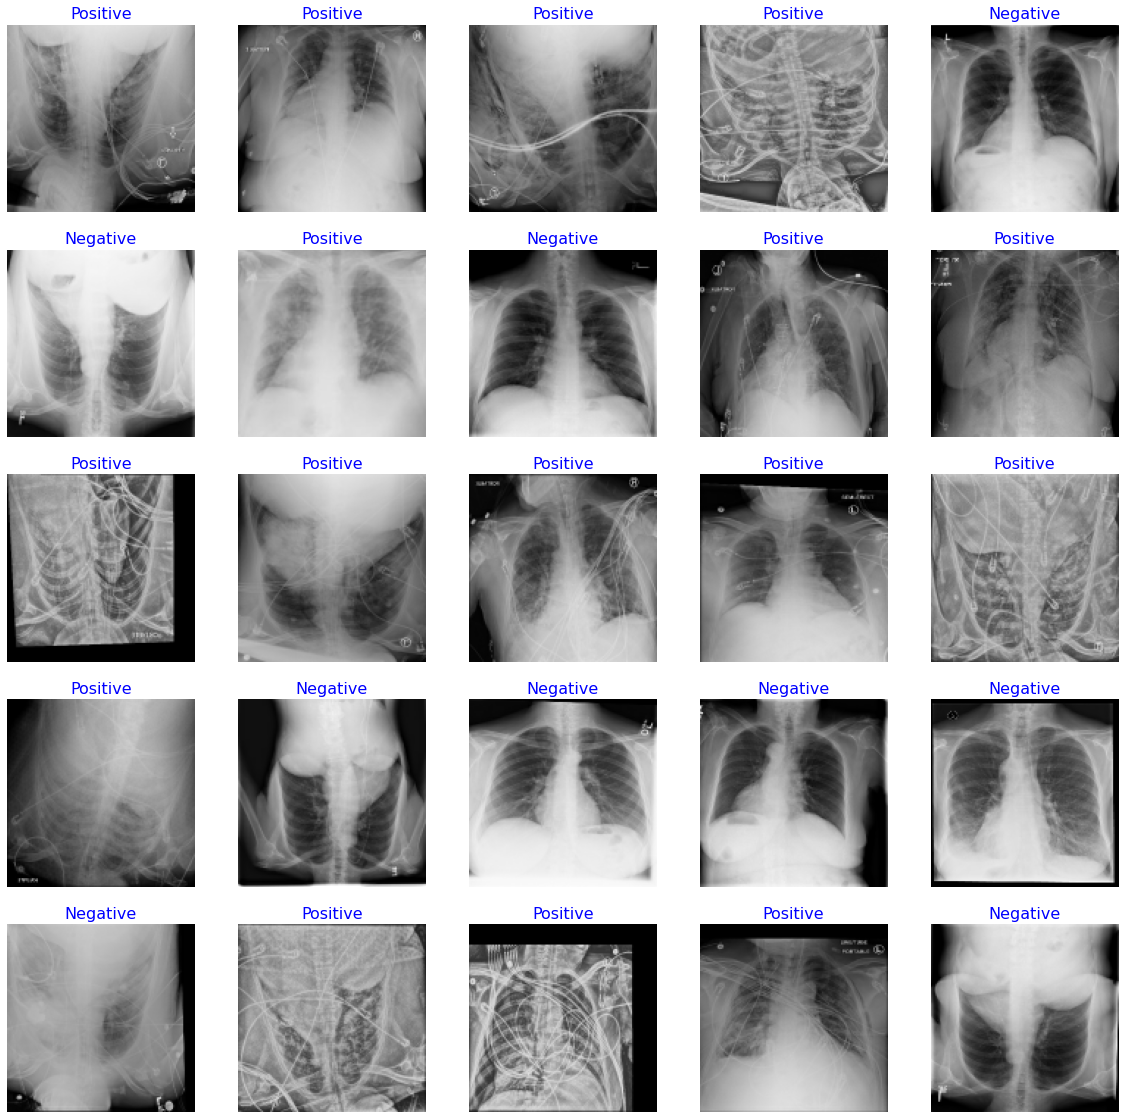

In [43]:
from matplotlib import pyplot as plt
images, labels = next(iter(train_dataset))
#get sample batch from the generator
plt.figure(figsize=(20,20))
length = len(labels)

if length<25:
    r=length
else:
    r=25

for i in range(r):
    plt.subplot(5, 5, i+1)
    image= (images[i])
    plt.imshow(image)
    index=np.argmax(labels[i])
    class_name=CLASSES[index]
    plt.title(class_name, color='blue', fontsize=16)
    plt.axis('off')
plt.show()

# **2- Model Creation, Training, and Evalution:**

# 2-1: Model #1: MobileViT

In [59]:
# Values are from table 4.
patch_size = 16  # 2x2, for the Transformer blocks.
image_size = 128
expansion_factor = 2  # expansion factor for the MobileNetV2 blocks.



def conv_block(x, filters=16, kernel_size=3, strides=2):
    conv_layer = layers.Conv2D(
        filters, kernel_size, strides=strides, activation=tf.nn.swish, padding="same"
    )
    return conv_layer(x)


# Reference: https://git.io/JKgtC


def inverted_residual_block(x, expanded_channels, output_channels, strides=1):
    m = layers.Conv2D(expanded_channels, 1, padding="same", use_bias=False)(x)
    m = layers.BatchNormalization()(m)
    m = tf.nn.swish(m)

    if strides == 2:
        m = layers.ZeroPadding2D(padding=imagenet_utils.correct_pad(m, 3))(m)
    m = layers.DepthwiseConv2D(
        3, strides=strides, padding="same" if strides == 1 else "valid", use_bias=False
    )(m)
    m = layers.BatchNormalization()(m)
    m = tf.nn.swish(m)

    m = layers.Conv2D(output_channels, 1, padding="same", use_bias=False)(m)
    m = layers.BatchNormalization()(m)

    if tf.math.equal(x.shape[-1], output_channels) and strides == 1:
        return layers.Add()([m, x])
    return m


# Reference:
# https://keras.io/examples/vision/image_classification_with_vision_transformer/


def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.swish)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


def transformer_block(x, transformer_layers, projection_dim, num_heads=2):
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, x])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=[x.shape[-1] * 2, x.shape[-1]], dropout_rate=0.1,)
        #print(x.shape[-1] * 2, x.shape[-1])
        # Skip connection 2.
        x = layers.Add()([x3, x2])

    return x


def mobilevit_block(x, num_blocks, projection_dim, strides=1):
    # Local projection with convolutions.
    local_features = conv_block(x, filters=projection_dim, strides=strides)
    local_features = conv_block(
        local_features, filters=projection_dim, kernel_size=1, strides=strides
    )

    # Unfold into patches and then pass through Transformers.
    num_patches = int((local_features.shape[1] * local_features.shape[2]) / patch_size)
    non_overlapping_patches = layers.Reshape((patch_size, num_patches, projection_dim))(
        local_features
    )
    global_features = transformer_block(
        non_overlapping_patches, num_blocks, projection_dim
    )

    # Fold into conv-like feature-maps.
    folded_feature_map = layers.Reshape((*local_features.shape[1:-1], projection_dim))(
        global_features
    )

    # Apply point-wise conv -> concatenate with the input features.
    folded_feature_map = conv_block(
        folded_feature_map, filters=x.shape[-1], kernel_size=1, strides=strides
    )
    local_global_features = layers.Concatenate(axis=-1)([x, folded_feature_map])

    # Fuse the local and global features using a convoluion layer.
    local_global_features = conv_block(
        local_global_features, filters=projection_dim, strides=strides
    )

    return local_global_features


In [60]:
###### MobileViT_xxs:
#dims = [64, 80, 96]
#channels = [16, 16, 24, 24, 48, 48, 64, 64, 80, 80, 320]

#MobileViT_s:
dims = [144, 192, 240]
channels = [16, 32, 64, 64, 96, 96, 128, 128, 160, 160, 640]


def create_mobilevit(num_classes=2):
    inputs = keras.Input((image_size, image_size, 3))
    x = tf.keras.layers.Rescaling(scale=1.0 / 255)(inputs)

    #xx = model1.input()(x)
    # Initial conv-stem -> MV2 block.
    x = conv_block(x, filters=channels[0])
    x = inverted_residual_block(
        x, expanded_channels=channels[0] * expansion_factor, output_channels=channels[1])

    # Downsampling with MV2 block.
    x = inverted_residual_block(
        x, expanded_channels=channels[1] * expansion_factor, output_channels=channels[2], strides=2)
    x = inverted_residual_block(
        x, expanded_channels=channels[2] * expansion_factor, output_channels=channels[3])
    x = inverted_residual_block(
        x, expanded_channels=channels[2] * expansion_factor, output_channels=channels[3])

    # First MV2 -> MobileViT block.
    x = inverted_residual_block(
        x, expanded_channels=channels[3] * expansion_factor, output_channels=channels[4], strides=2)
    x = mobilevit_block(x, num_blocks=2, projection_dim=dims[0])

    # Second MV2 -> MobileViT block.
    x = inverted_residual_block(
        x, expanded_channels=channels[6] * expansion_factor, output_channels=channels[7], strides=2)
    x = mobilevit_block(x, num_blocks=4, projection_dim=dims[1])

    # Third MV2 -> MobileViT block.
    x = inverted_residual_block(
        x, expanded_channels=channels[8] * expansion_factor, output_channels=channels[9], strides=2)
    x = mobilevit_block(x, num_blocks=3, projection_dim=dims[2])
    
    x = conv_block(x, filters=channels[10], kernel_size=1, strides=1)

    # Classification head.
    x = layers.GlobalAvgPool2D()(x)
    x = layers.BatchNormalization()(x)
    #x1 = layers.Flatten()(x)
    
    #x2 = model1.output
    #x2 = layers.GlobalAvgPool2D()(x2)
    #x3 = tf.keras.layers.concatenate([x1, x2],axis=1)

    x = tf.keras.layers.Dense(256,   activation = tfa.activations.gelu,#(x3)
                              kernel_regularizer= tf.keras.regularizers.l2(0.001), 
                              kernel_initializer= tf.keras.initializers.HeUniform())(x)
    #x = layers.Dense(128,activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(128,   activation = tfa.activations.gelu,#(x3)
                              kernel_regularizer= tf.keras.regularizers.l2(0.001), 
                              kernel_initializer= tf.keras.initializers.HeUniform())(x)
    #x = layers.Dense(128,activation='relu')(x)
    x = layers.Dropout(0.1)(x)
   
    
    outputs = layers.Dense(num_classes, activation="softmax")(x)

   # return keras.Model(inputs=[inputs,model1.input], outputs=outputs)
    return keras.Model(inputs=inputs, outputs=outputs)


mobilevit_xxs = create_mobilevit()


In [61]:
#mobilevit_xxs.summary()
#tf.keras.utils.plot_model(mobilevit_xxs,show_shapes=True)

In [64]:
#learning_rate = 0.0002
label_smoothing_factor = 0.1
epochs = 30

num_classes=2
initial_learning_rate = 0.0001
final_learning_rate =   0.000001
epochs=epochs
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epochs)
steps_per_epoch = 844

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=False)


mobilevit_xxs = create_mobilevit(num_classes=num_classes)
mobilevit_xxs.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), 
                      loss=tf.keras.losses.MeanSquaredLogarithmicError(),
                      #loss=keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing_factor), 
                      metrics=["accuracy"])

checkpoint_filepath = '/kaggle/working/01/' #"/tmp/checkpoint"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=False,
)


In [65]:
Model1_history = mobilevit_xxs.fit(train_dataset,
                                    validation_data=val_dataset,
                                    epochs=epochs, 
        #steps_per_epoch=150,
        callbacks=[checkpoint_callback],
)

Epoch 1/30
844/844 [==============================] - 162s 177ms/step - loss: 0.6745 - accuracy: 0.8438 - val_loss: 0.5493 - val_accuracy: 0.7789


2023-01-31 19:34:41.210663: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
844/844 [==============================] - 145s 171ms/step - loss: 0.4044 - accuracy: 0.9011 - val_loss: 0.3679 - val_accuracy: 0.7659
Epoch 3/30
844/844 [==============================] - 146s 173ms/step - loss: 0.2441 - accuracy: 0.9188 - val_loss: 0.2246 - val_accuracy: 0.8249


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 4/30
844/844 [==============================] - 146s 172ms/step - loss: 0.1530 - accuracy: 0.9304 - val_loss: 0.1895 - val_accuracy: 0.7402
Epoch 5/30
844/844 [==============================] - 146s 173ms/step - loss: 0.1029 - accuracy: 0.9357 - val_loss: 0.1691 - val_accuracy: 0.7012
Epoch 6/30
844/844 [==============================] - 147s 174ms/step - loss: 0.0741 - accuracy: 0.9438 - val_loss: 0.0768 - val_accuracy: 0.9050


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 7/30
844/844 [==============================] - 145s 172ms/step - loss: 0.0565 - accuracy: 0.9496 - val_loss: 0.0777 - val_accuracy: 0.8753
Epoch 8/30
844/844 [==============================] - 145s 171ms/step - loss: 0.0370 - accuracy: 0.9615 - val_loss: 0.0423 - val_accuracy: 0.9430


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 10/30
844/844 [==============================] - 145s 171ms/step - loss: 0.0318 - accuracy: 0.9651 - val_loss: 0.0460 - val_accuracy: 0.9223
Epoch 11/30
844/844 [==============================] - 144s 170ms/step - loss: 0.0274 - accuracy: 0.9687 - val_loss: 0.0728 - val_accuracy: 0.8286
Epoch 12/30
844/844 [==============================] - 143s 169ms/step - loss: 0.0246 - accuracy: 0.9710 - val_loss: 0.0744 - val_accuracy: 0.8473
Epoch 13/30
844/844 [==============================] - 145s 171ms/step - loss: 0.0221 - accuracy: 0.9734 - val_loss: 0.0372 - val_accuracy: 0.9293
Epoch 14/30
844/844 [==============================] - 144s 170ms/step - loss: 0.0203 - accuracy: 0.9760 - val_loss: 0.0222 - val_accuracy: 0.9703


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 15/30
844/844 [==============================] - 145s 171ms/step - loss: 0.0185 - accuracy: 0.9776 - val_loss: 0.0234 - val_accuracy: 0.9637
Epoch 16/30
844/844 [==============================] - 144s 170ms/step - loss: 0.0170 - accuracy: 0.9800 - val_loss: 0.0215 - val_accuracy: 0.9670
Epoch 17/30
844/844 [==============================] - 144s 170ms/step - loss: 0.0157 - accuracy: 0.9823 - val_loss: 0.0204 - val_accuracy: 0.9683
Epoch 18/30
844/844 [==============================] - 144s 170ms/step - loss: 0.0150 - accuracy: 0.9825 - val_loss: 0.0275 - val_accuracy: 0.9523
Epoch 19/30
844/844 [==============================] - 144s 170ms/step - loss: 0.0143 - accuracy: 0.9831 - val_loss: 0.0188 - val_accuracy: 0.9707


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 20/30
844/844 [==============================] - 145s 172ms/step - loss: 0.0134 - accuracy: 0.9851 - val_loss: 0.0191 - val_accuracy: 0.9693
Epoch 21/30
844/844 [==============================] - 146s 172ms/step - loss: 0.0129 - accuracy: 0.9855 - val_loss: 0.0215 - val_accuracy: 0.9627
Epoch 22/30
844/844 [==============================] - 145s 171ms/step - loss: 0.0123 - accuracy: 0.9864 - val_loss: 0.0178 - val_accuracy: 0.9707
Epoch 23/30
844/844 [==============================] - 146s 173ms/step - loss: 0.0121 - accuracy: 0.9868 - val_loss: 0.0172 - val_accuracy: 0.9730


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 24/30
844/844 [==============================] - 145s 172ms/step - loss: 0.0117 - accuracy: 0.9880 - val_loss: 0.0181 - val_accuracy: 0.9693
Epoch 25/30
844/844 [==============================] - 146s 173ms/step - loss: 0.0115 - accuracy: 0.9877 - val_loss: 0.0168 - val_accuracy: 0.9733


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 26/30
844/844 [==============================] - 145s 172ms/step - loss: 0.0113 - accuracy: 0.9879 - val_loss: 0.0168 - val_accuracy: 0.9737


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 27/30
844/844 [==============================] - 143s 169ms/step - loss: 0.0109 - accuracy: 0.9884 - val_loss: 0.0163 - val_accuracy: 0.9737
Epoch 28/30
844/844 [==============================] - 145s 172ms/step - loss: 0.0108 - accuracy: 0.9885 - val_loss: 0.0166 - val_accuracy: 0.9733
Epoch 29/30
844/844 [==============================] - 144s 170ms/step - loss: 0.0105 - accuracy: 0.9892 - val_loss: 0.0166 - val_accuracy: 0.9723
Epoch 30/30
844/844 [==============================] - 145s 172ms/step - loss: 0.0105 - accuracy: 0.9892 - val_loss: 0.0165 - val_accuracy: 0.9727


In [67]:
acc = mobilevit_xxs.evaluate(val_dataset)
acc = mobilevit_xxs.evaluate(test_dataset)


13/13 [==============================] - 1s 50ms/step - loss: 0.0397 - accuracy: 0.9100


In [71]:
best_epoch_model = model_1 = tf.keras.models.load_model('/kaggle/working/01/') 

best_acc = best_epoch_model.evaluate(val_dataset)
best_acc = best_epoch_model.evaluate(test_dataset)


13/13 [==============================] - 1s 54ms/step - loss: 0.0370 - accuracy: 0.9250


In [69]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data['accuracy']
    tloss=tr_data['loss']
    vacc=tr_data['val_accuracy']
    vloss=tr_data['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()
    

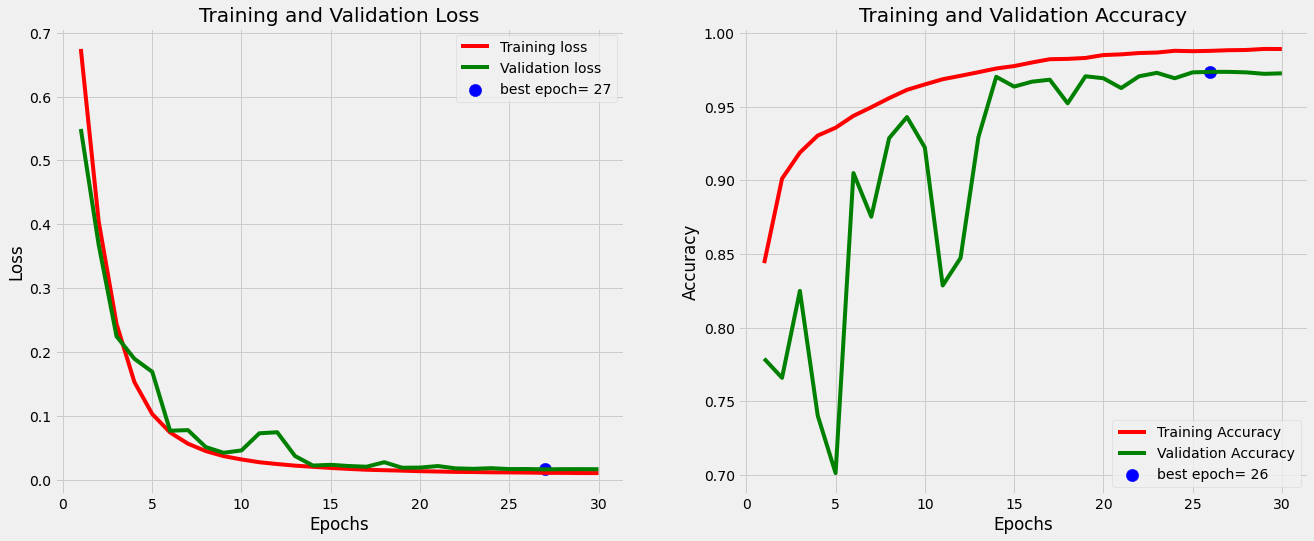

In [70]:
history = Model1_history.history
#is.history.keys()
tr_plot(history, 0)

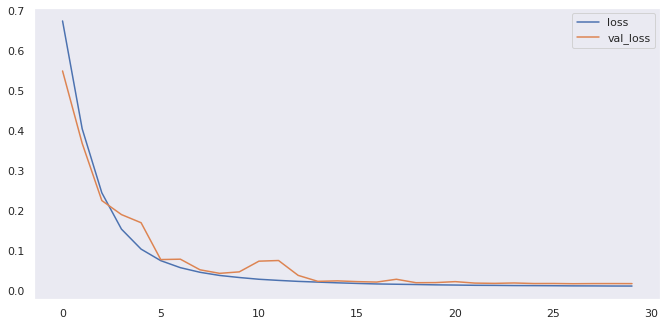

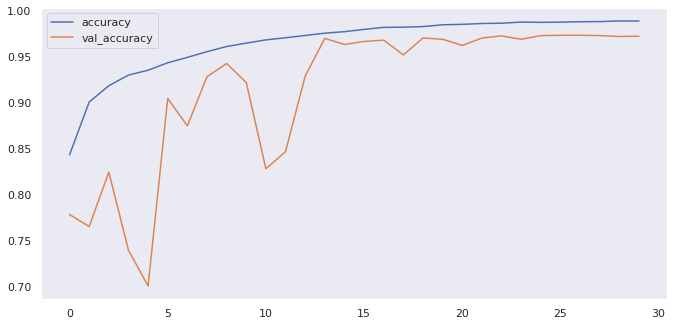

In [100]:
# Plotting train_loss vs val_loss
model=Model1_history
plt.figure(figsize=(10,5))
plt.plot(model.history["loss"],label="loss")
plt.plot(model.history["val_loss"],label="val_loss")
plt.legend()
plt.figure(figsize=(10,5))
plt.plot(model.history["accuracy"],label="accuracy")
plt.plot(model.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [72]:
mobilevit_xxs.save("./MobileViT/")

#import shutil
#shutil.make_archive('MobileViT', 'zip', "./MobileViT/")
#import os
#os.chdir(r'./')
#from IPython.display import FileLink
#FileLink(r'MobileViT.zip')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


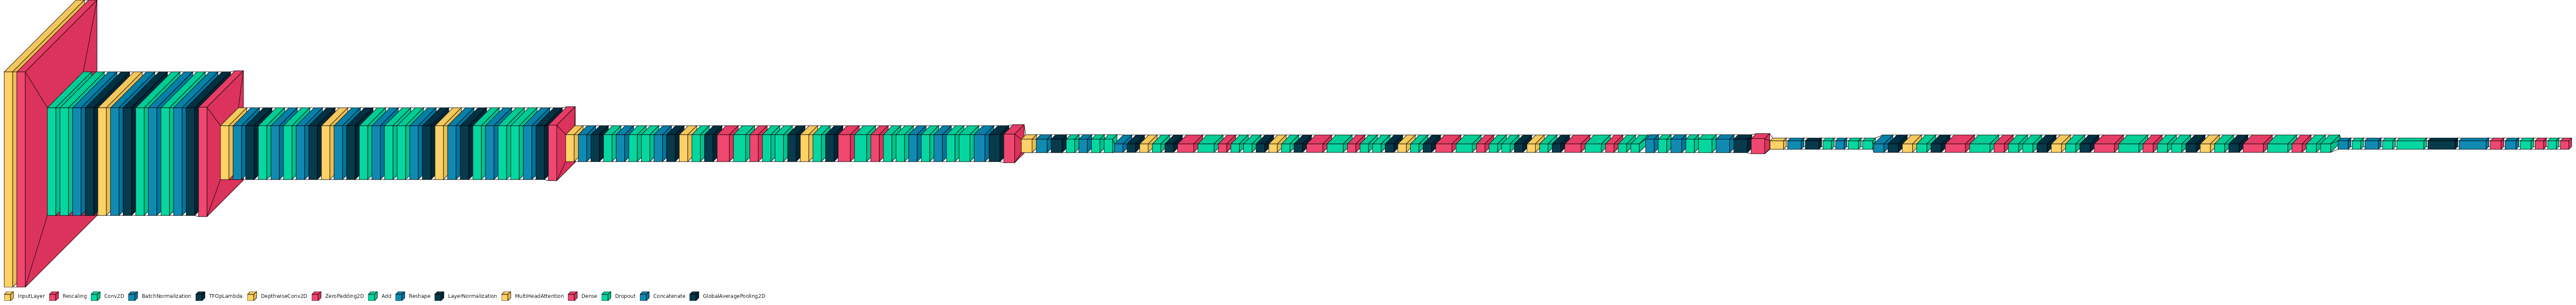

In [119]:
import visualkeras
from PIL import ImageFont

font = ImageFont.truetype('/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', 12)
visualkeras.layered_view(mobilevit_xxs, legend=True, font=font) # selected font


# 2-2: Model #2: MobileNetV3

In [73]:
base= tf.keras.applications.MobileNetV3Large(
    input_shape=(image_size, image_size, 3),
    alpha=1.0,
    #minimalistic=False,
    include_top=False,
    weights='imagenet',
    #input_tensor=None,
    #classes=5,
    #pooling=None,
    dropout_rate=0.2,
    #classifier_activation='softmax',
    #include_preprocessing=True
)

17620992/17605208 [==============================] - 0s 0us/step


In [76]:
Custom_MobileNetV3 = tf.keras.Sequential([
        base,
        #tf.keras.layers.Flatten(),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256,   activation = 'relu', 
                              kernel_regularizer= tf.keras.regularizers.l2(0.001), 
                              kernel_initializer= tf.keras.initializers.HeUniform()),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2, 'softmax')
    ],
    name = 'xxx')

model2.summary()

Model: "xxx"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MobilenetV3large (Functional (None, 1, 1, 1280)        4226432   
_________________________________________________________________
global_average_pooling2d_17  (None, 1280)              0         
_________________________________________________________________
batch_normalization_428 (Bat (None, 1280)              5120      
_________________________________________________________________
dense_336 (Dense)            (None, 256)               327936    
_________________________________________________________________
batch_normalization_429 (Bat (None, 256)               1024      
_________________________________________________________________
dropout_329 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_337 (Dense)            (None, 2)                 514     

In [77]:
#learning_rate = 0.0002
label_smoothing_factor = 0.1
epochs = 30

num_classes=2
initial_learning_rate = 0.0001
final_learning_rate =   0.00001
epochs=epochs
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epochs)
steps_per_epoch = 844


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=False)



optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
loss_fn = keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing_factor)


#train_dataset=TRAIN_GEN
#val_dataset=VALID_GEN
#num_classes=5 


Custom_MobileNetV3.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

checkpoint_filepath = "/kaggle/working/02/"#"/tmp/checkpoint"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=False,
)


In [78]:
Model2_history = Custom_MobileNetV3.fit(train_dataset,
                                    validation_data=val_dataset,
                                    epochs=epochs, 
        #steps_per_epoch=150,
        callbacks=[checkpoint_callback],
)

Epoch 1/30
844/844 [==============================] - 78s 83ms/step - loss: 0.9343 - accuracy: 0.8649 - val_loss: 1.1843 - val_accuracy: 0.4818
Epoch 2/30
844/844 [==============================] - 70s 82ms/step - loss: 0.7679 - accuracy: 0.9203 - val_loss: 1.0335 - val_accuracy: 0.6999
Epoch 3/30
844/844 [==============================] - 69s 82ms/step - loss: 0.6846 - accuracy: 0.9380 - val_loss: 0.9956 - val_accuracy: 0.6355
Epoch 4/30
844/844 [==============================] - 69s 81ms/step - loss: 0.6179 - accuracy: 0.9495 - val_loss: 0.8701 - val_accuracy: 0.7382
Epoch 5/30
844/844 [==============================] - 69s 81ms/step - loss: 0.5598 - accuracy: 0.9584 - val_loss: 0.8078 - val_accuracy: 0.7693
Epoch 6/30
844/844 [==============================] - 70s 82ms/step - loss: 0.5088 - accuracy: 0.9643 - val_loss: 0.7452 - val_accuracy: 0.7796
Epoch 7/30
844/844 [==============================] - 70s 82ms/step - loss: 0.4634 - accuracy: 0.9703 - val_loss: 0.7494 - val_accuracy:

In [79]:
acc2 = Custom_MobileNetV3.evaluate(test_dataset)
print('Accuracy = ',acc2)

13/13 [==============================] - 1s 67ms/step - loss: 0.2663 - accuracy: 0.9700
Accuracy =  [0.26631835103034973, 0.9700000286102295]


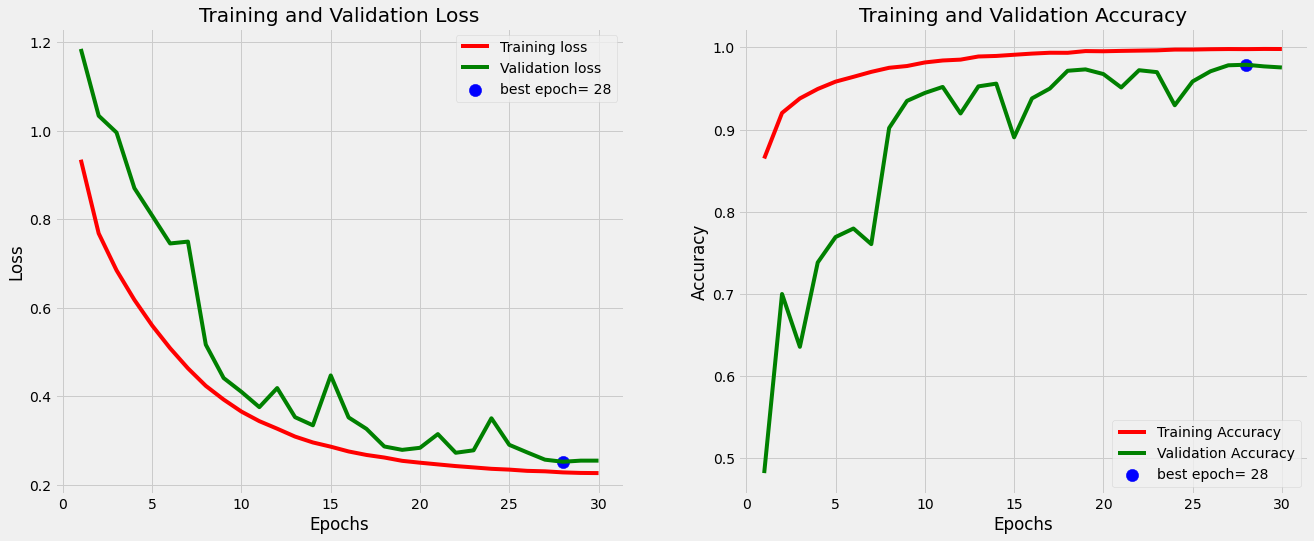

In [80]:
history = Model2_history.history
#is.history.keys()
tr_plot(history, 0)

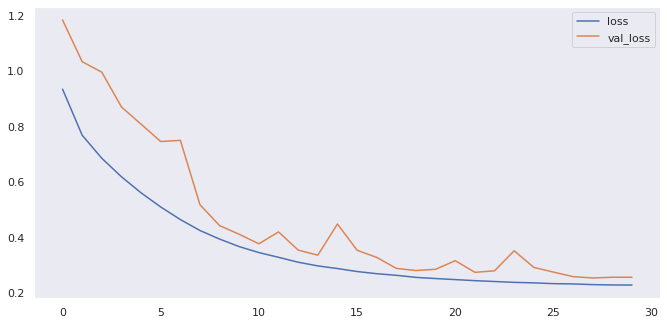

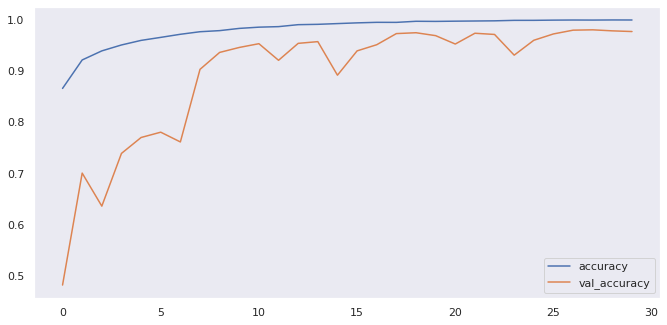

In [106]:
# Plotting train_loss vs val_loss
model=Model2_history
plt.figure(figsize=(10,5))
plt.plot(model.history["loss"],label="loss")
plt.plot(model.history["val_loss"],label="val_loss")
plt.legend()
plt.figure(figsize=(10,5))
plt.plot(model.history["accuracy"],label="accuracy")
plt.plot(model.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [89]:
Custom_MobileNetV3.save("./MobileNetV3/")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


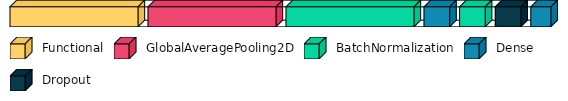

In [120]:
font = ImageFont.truetype('/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', 12)
visualkeras.layered_view(Custom_MobileNetV3, legend=True, font=font) # selected font


# 5- Ensemble and Results


In [82]:
test_path= '/tmp/COVID_dataset_test/'
test_list = list(paths.list_images(test_path))

CLASSES = ['Negative','Positive']

test_labels = [path.split('/')[3] for path in test_list]
y_test=[]
for label in test_labels:
    if label == 'Positive':
        y_test.append(0)
    else:
        y_test.append(1)
              
len(y_test)

400

In [90]:
model_1 = tf.keras.models.load_model("/kaggle/working/01/")#('/kaggle/working/MobileViT')#mobilevit_xxs #load_model('../input/model1aa/model.hdfs')
model_2 = tf.keras.models.load_model('/kaggle/working/MobileNetV3')

In [127]:
preds=[]
models= [model_1, model_2]
preds = [model_1.predict(test_dataset), model_2.predict(test_dataset)]

#preds = [model.predict(X_test1) for model in models]
preds =np.array(preds)

weights = [0.3,0.7]
weighted_pred = np.tensordot(preds,weights,axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_pred, axis=1)

summed = np.sum(preds, axis=0)
ensemble_prediction = np.argmax(summed, axis=1)

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

predic1= model_1.predict(test_dataset)
predic1 = np.argmax(predic1, axis=1)
acc1= accuracy_score(y_test, predic1)

predic2= model_2.predict(test_dataset)
predic2 = np.argmax(predic2, axis=1)
acc2= accuracy_score(y_test, predic2)

print('ViT Model (#1) accuracy (%)= ',acc1)
print('CNN Model (#2) accuracy (%)= ',acc2)

acc = accuracy_score (y_test, ensemble_prediction)
print('Ensemble model (%)= ',acc)

acc0 = accuracy_score (y_test, weighted_ensemble_prediction)
print('Weighted-Ensemble model (%)= ',acc0)

ViT Model (#1) accuracy (%)=  0.925
CNN Model (#2) accuracy (%)=  0.97
Ensemble model (%)=  0.955
Weighted-Ensemble model (%)=  0.9775


In [129]:
from sklearn.metrics import confusion_matrix


matrix1 = confusion_matrix(y_test, predic1)
print('Confusion Matrix: Model #1\n',matrix1)
matrix2 = confusion_matrix(y_test, predic2)
print('Confusion Matrix: Model #2\n',matrix2)
matrix3 = confusion_matrix(y_test, weighted_ensemble_prediction)
print('Confusion Matrix: Ensemble Model\n',matrix3)

Confusion Matrix: Model #1
 [[194   6]
 [ 24 176]]
Confusion Matrix: Model #2
 [[195   5]
 [  7 193]]
Confusion Matrix: Ensemble Model
 [[197   3]
 [  6 194]]


In [130]:
import itertools
import seaborn as sns

#Plot the Confusion matrix:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    sns.set(style="dark")
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n Accuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

- Model #1 : -----------------------


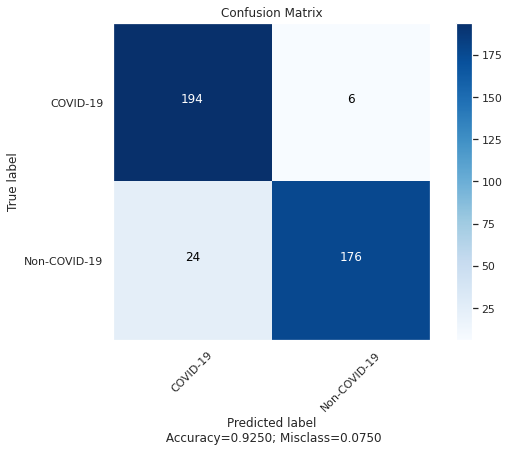

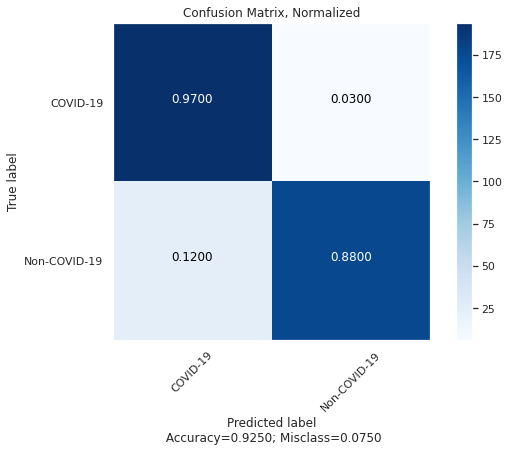

In [131]:
print('- Model #1 : -----------------------')

plot_confusion_matrix(cm           = np.array(matrix1), 
                      normalize    = False,
                      target_names = ['COVID-19','Non-COVID-19'],
                      title        = "Confusion Matrix")

plot_confusion_matrix(cm           = np.array(matrix1), 
                      normalize    = True,
                      target_names = ['COVID-19','Non-COVID-19'],
                      title        = "Confusion Matrix, Normalized")

- Model #2 :-----------------------


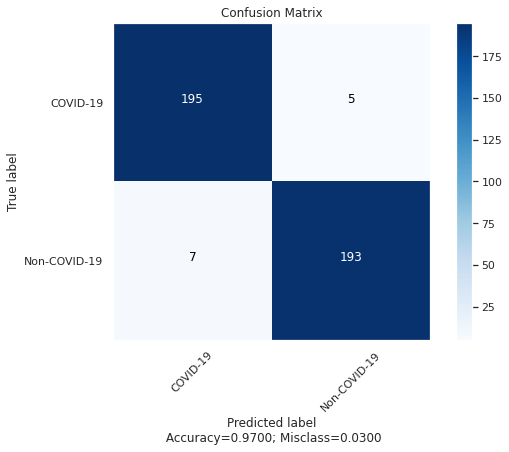

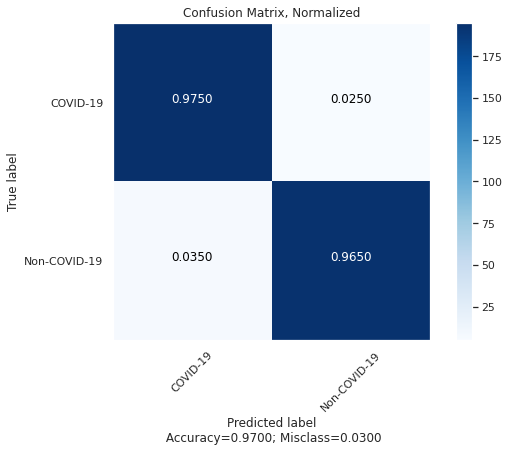

In [132]:
print('- Model #2 :-----------------------')

plot_confusion_matrix(cm           = np.array(matrix2), 
                      normalize    = False,
                      target_names = ['COVID-19','Non-COVID-19'],
                      title        = "Confusion Matrix")

plot_confusion_matrix(cm           = np.array(matrix2), 
                      normalize    = True,
                      target_names = ['COVID-19','Non-COVID-19'],
                      title        = "Confusion Matrix, Normalized")

- Ensemble Model -----------------------


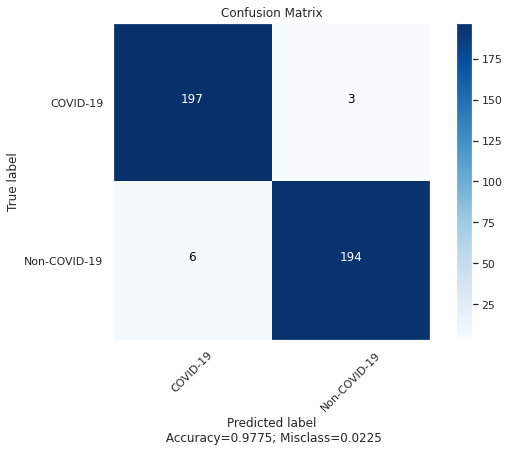

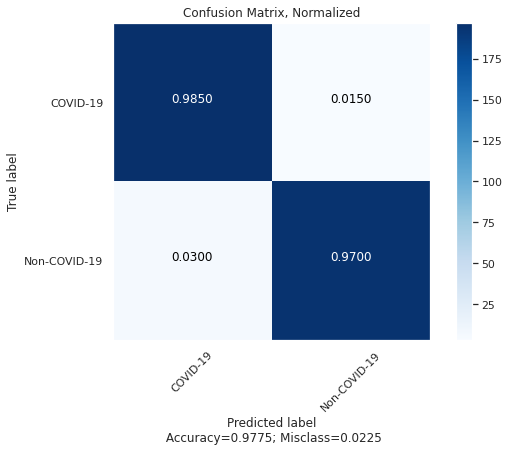

In [133]:
print('- Ensemble Model -----------------------')

plot_confusion_matrix(cm           = np.array(matrix3), 
                      normalize    = False,
                      target_names = ['COVID-19','Non-COVID-19'],
                      title        = "Confusion Matrix")

plot_confusion_matrix(cm           = np.array(matrix3), 
                      normalize    = True,
                      target_names = ['COVID-19','Non-COVID-19'],
                      title        = "Confusion Matrix, Normalized")

In [134]:
from sklearn.metrics import classification_report

print('- Model #1  -----------------------')
print(classification_report(y_test, predic1,digits=3),'\n')
print('- Model #2 -----------------------')
print(classification_report(y_test, predic2,digits=3),'\n')
print('- Ensemble Model -----------------------')
print(classification_report(y_test, weighted_ensemble_prediction,digits=3))

- Model #1  -----------------------
              precision    recall  f1-score   support

           0      0.890     0.970     0.928       200
           1      0.967     0.880     0.921       200

    accuracy                          0.925       400
   macro avg      0.928     0.925     0.925       400
weighted avg      0.928     0.925     0.925       400
 

- Model #2 -----------------------
              precision    recall  f1-score   support

           0      0.965     0.975     0.970       200
           1      0.975     0.965     0.970       200

    accuracy                          0.970       400
   macro avg      0.970     0.970     0.970       400
weighted avg      0.970     0.970     0.970       400
 

- Ensemble Model -----------------------
              precision    recall  f1-score   support

           0      0.970     0.985     0.978       200
           1      0.985     0.970     0.977       200

    accuracy                          0.978       400
   macro avg

**Modified by: M Amir Eshraghi**

In [118]:
!pip install visualkeras


     |████████████████████████████████| 989 kB 2.1 MB/s            
